In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm
import corner
import scipy.stats as st
from statistics import mean
from collections import Counter

In [2]:
file_path = 'Datasets/mt_genes_metadata.csv'

met = pd.read_csv(file_path)

pro_code=met[met['gene_type']=='protein_coding']
intpro=pro_code['gene_name'].tolist()
intpro=['MT-ND1','MT-ND2','MT-ND3','MT-ND4','MT-ND4L','MT-ND5','MT-ND6', 'MT-CO1', 'MT-CO2','MT-CO3', 'MT-ATP6', 'MT-ATP8', 'MT-CYB']
intpro

['MT-ND1',
 'MT-ND2',
 'MT-ND3',
 'MT-ND4',
 'MT-ND4L',
 'MT-ND5',
 'MT-ND6',
 'MT-CO1',
 'MT-CO2',
 'MT-CO3',
 'MT-ATP6',
 'MT-ATP8',
 'MT-CYB']

In [3]:
file_path = 'Datasets/Donor1_CD4_Genes.csv'

p14 = pd.read_csv(file_path)

p14.drop(columns=p14.columns[0], axis=1, inplace=True)

pat1_4int=pd.DataFrame([p14[i] for i in intpro]).T

file_path = 'Datasets/Donor1_CD8_Genes.csv'

p18 = pd.read_csv(file_path)

p18.drop(columns=p18.columns[0], axis=1, inplace=True)

pat1_8int=pd.DataFrame([p18[i] for i in intpro]).T

file_path = 'Datasets/Donor2_CD4_Genes.csv'

p24 = pd.read_csv(file_path)

p24.drop(columns=p24.columns[0], axis=1, inplace=True)

pat2_4int=pd.DataFrame([p24[i] for i in intpro]).T

file_path = 'Datasets/Donor2_CD8_Genes.csv'

p28 = pd.read_csv(file_path)

p28.drop(columns=p28.columns[0], axis=1, inplace=True)

pat2_8int=pd.DataFrame([p28[i] for i in intpro]).T

total=pd.concat([p14,p18,p24,p28])

total_int=pd.concat([pat1_4int,pat1_8int, pat2_4int,pat2_8int])

totaln=len(total_int)


In [4]:
total_sampto=total.sum() #total number of each gene
totalgene=total_sampto.sum() #total number of genes

In [5]:
#number of DNA strands in each file
p14n=len(pat1_4int)
p18n=len(pat1_8int)
p24n=len(pat2_4int)
p28n=len(pat2_8int)

In [6]:
#Calculates the number of genes for each DNA
p14_allsampto=p14.sum(axis=1)
p18_allsampto=p18.sum(axis=1)
p24_allsampto=p24.sum(axis=1)
p28_allsampto=p28.sum(axis=1)

Normalising data and then computing Unbiased estimate of neg binom proportion

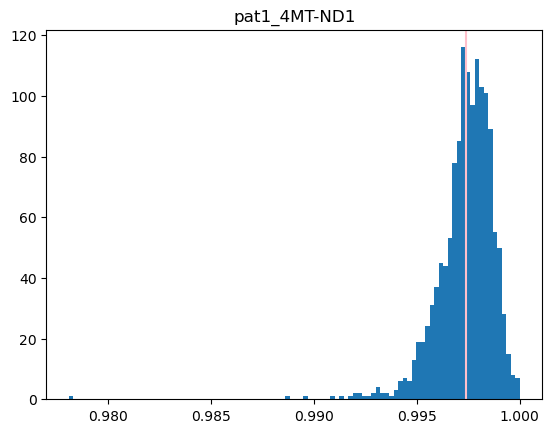

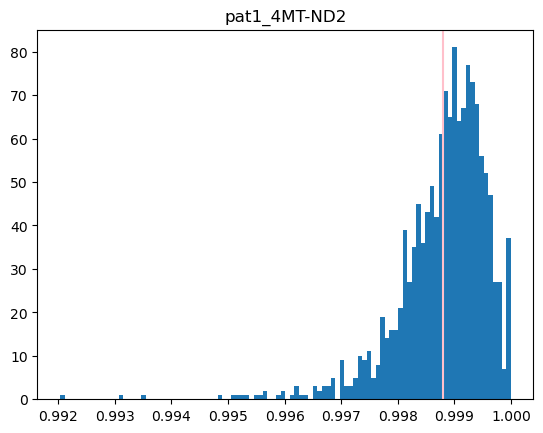

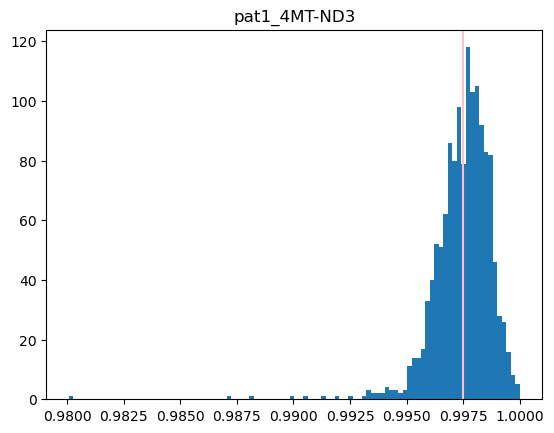

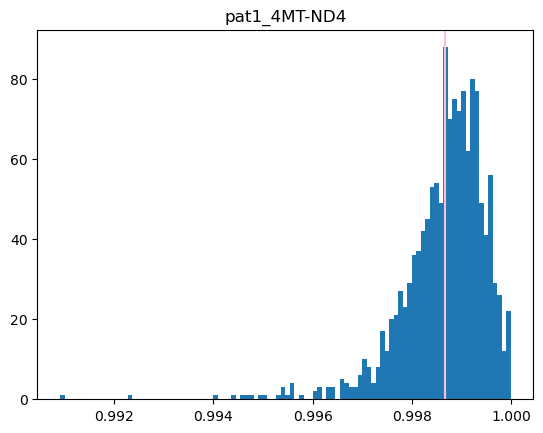

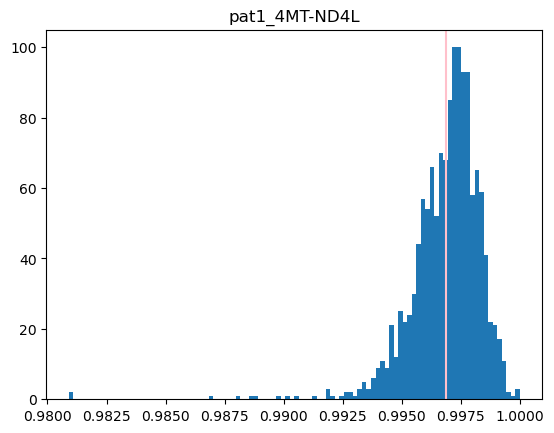

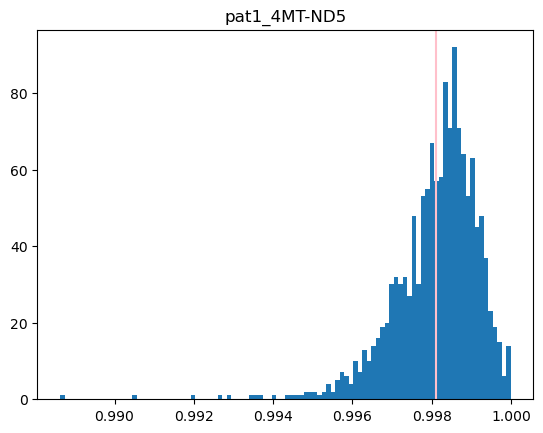

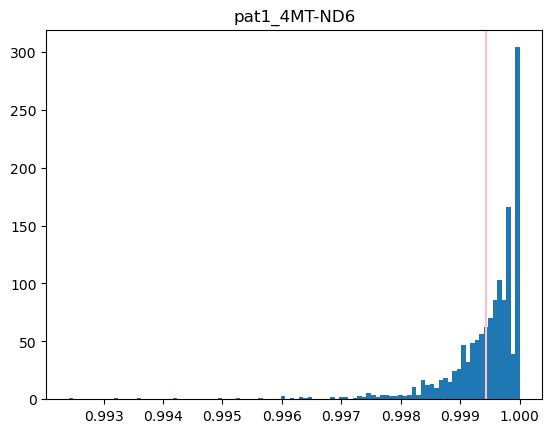

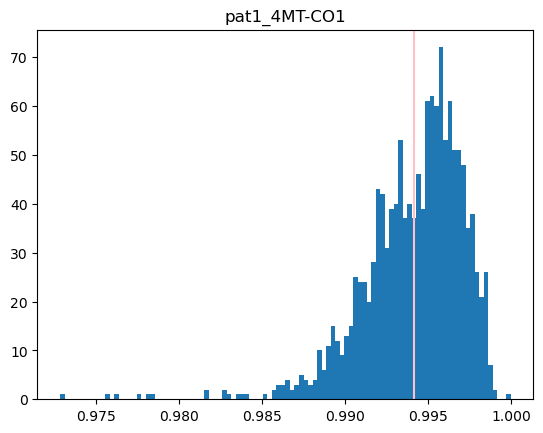

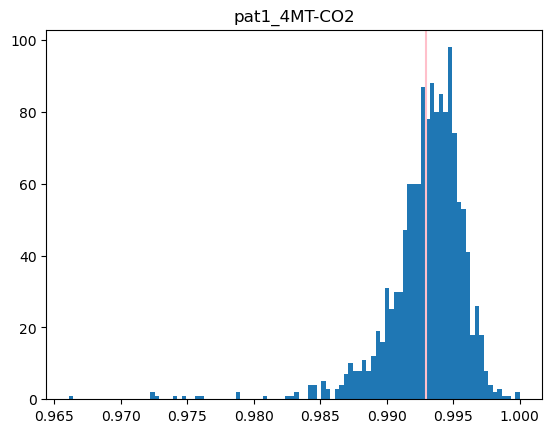

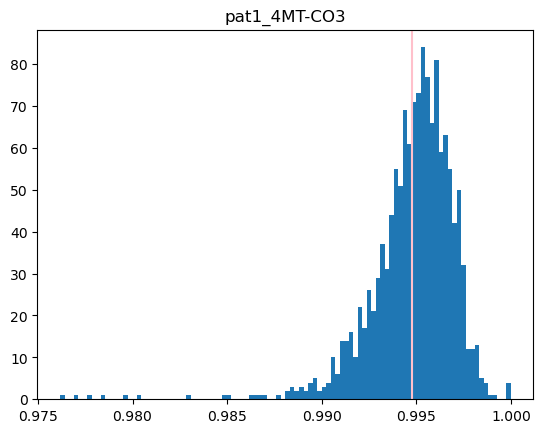

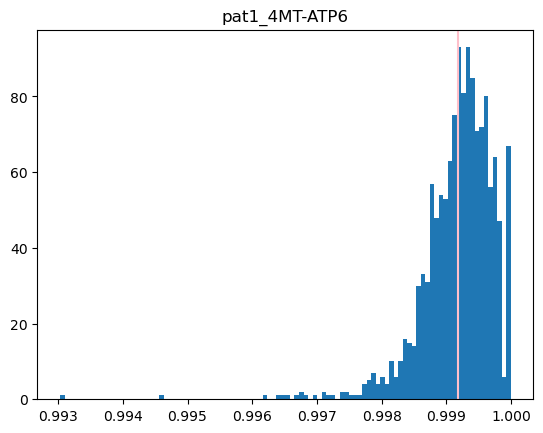

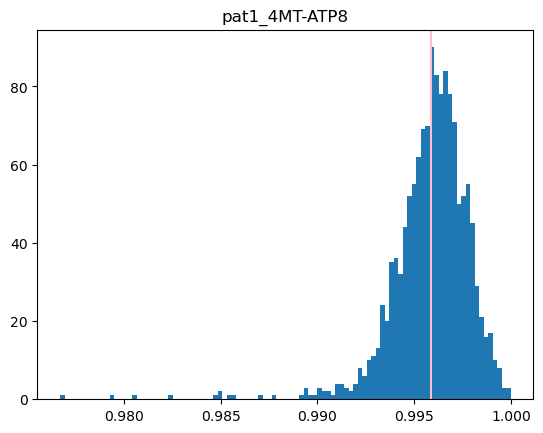

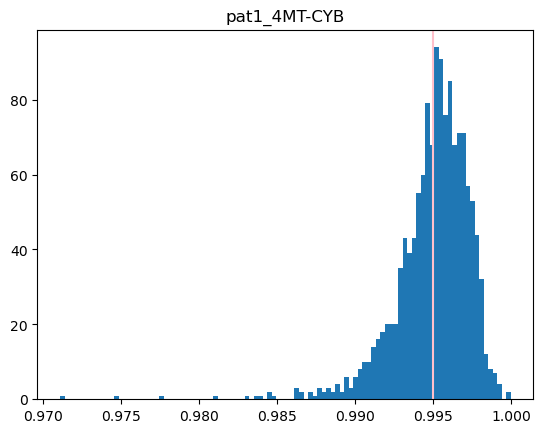

{'MT-ND1': 0.9973631963764747,
 'MT-ND2': 0.9988064883326756,
 'MT-ND3': 0.997476549325719,
 'MT-ND4': 0.9986610119965768,
 'MT-ND4L': 0.9968742389123535,
 'MT-ND5': 0.9981162122324965,
 'MT-ND6': 0.9994244858081606,
 'MT-CO1': 0.9941385071004302,
 'MT-CO2': 0.9929643507462625,
 'MT-CO3': 0.9947905945989968,
 'MT-ATP6': 0.9991827989556595,
 'MT-ATP8': 0.9958575966868964,
 'MT-CYB': 0.9949783189737844}

In [24]:
r=1000
uem14_list=[]
for j in intpro:
    uem_sample_list=[]
    for i in range(p14n):   
        norm_cons=(p14_allsampto[i]-p14[j][i])/r #inidividual normalisation constant
        x=p14[j][i]/norm_cons
        uem=(r-1)/(x+r-1)
        uem_sample_list.append(uem)
    uem14_list.append(mean(uem_sample_list))
uem14_list=dict(zip(intpro,uem14_list))

uem18_list=[]
for j in intpro:
    uem_sample_list=[]
    for i in range(p18n):   
        norm_cons=(p18_allsampto[i]-p18[j][i])/r #inidividual normalisation constant
        x=p18[j][i]/norm_cons
        uem=(r-1)/(x+r-1)
        uem_sample_list.append(uem)
    uem18_list.append(mean(uem_sample_list))
uem18_list=dict(zip(intpro,uem18_list))

uem24_list=[]
for j in intpro:
    uem_sample_list=[]
    for i in range(p24n):   
        norm_cons=(p24_allsampto[i]-p24[j][i])/r #inidividual normalisation constant
        x=p24[j][i]/norm_cons
        uem=(r-1)/(x+r-1)
        uem_sample_list.append(uem)
    uem24_list.append(mean(uem_sample_list))
uem24_list=dict(zip(intpro,uem24_list))

uem28_list=[]
for j in intpro:
    uem_sample_list=[]
    for i in range(p28n):   
        norm_cons=(p28_allsampto[i]-p28[j][i])/r #inidividual normalisation constant
        x=p28[j][i]/norm_cons
        uem=(r-1)/(x+r-1)
        uem_sample_list.append(uem)
    uem28_list.append(mean(uem_sample_list))
    fig, ax = plt.subplots(1, 1) 
    ax.set_title('pat1_4'+''+j)
    ax.hist(uem_sample_list,bins=100)
    ax.axvline(mean(uem_sample_list), color='pink')
    plt.show()
uem28_list=dict(zip(intpro,uem28_list))
uem28_list

χ² test: H0: Follows nbin, H1: Doesn't Follow

In [8]:
#p1_4
df14=p14n-1
cv=st.chi2.ppf(0.99,df14)
chi1_p14_ts=[]
chi1_p14_res=[]
for j in intpro:
    ts=0
    p=uem14_list[j]
    for i in range(p14n):
        r=1000
        norm_cons=(p14_allsampto[i]-p14[j][i])/r #inidividual normalisation constant
        o=p14[j][i]/norm_cons
        e=r*(1-p)/p
        ts+=(e-o)**2/e
    chi1_p14_ts.append(ts)
    chi1_p14_res.append(ts-cv)
chi_p14_res=dict(zip(intpro,chi1_p14_res))
chi_p14_res

{'MT-ND1': -259.1006299814303,
 'MT-ND2': -994.5354100216814,
 'MT-ND3': -1110.4332543286637,
 'MT-ND4': -1385.0219285706173,
 'MT-ND4L': 851.3411864570539,
 'MT-ND5': -1156.954331634691,
 'MT-ND6': -1561.9014019043182,
 'MT-CO1': 3559.863627739884,
 'MT-CO2': 4969.570977377631,
 'MT-CO3': 3287.834732136768,
 'MT-ATP6': -1839.3653492497158,
 'MT-ATP8': 3207.6709603345557,
 'MT-CYB': 1849.5343145344264}

In [9]:
#p1_8
df18=p18n-1
cv=st.chi2.ppf(0.99,df18)
chi1_p18_ts=[]
chi1_p18_res=[]
for j in intpro:
    ts=0
    p=uem18_list[j]
    for i in range(p18n):
        r=1000
        norm_cons=(p18_allsampto[i]-p18[j][i])/r #inidividual normalisation constant
        o=p18[j][i]/norm_cons
        e=r*(1-p)/p
        ts+=(e-o)**2/e
    chi1_p18_ts.append(ts)
    chi1_p18_res.append(ts-cv)
chi_p18_res=dict(zip(intpro,chi1_p18_res))
chi_p18_res

{'MT-ND1': -1086.2564879612235,
 'MT-ND2': -1227.267873724294,
 'MT-ND3': -1285.5864712820774,
 'MT-ND4': -1399.139664297534,
 'MT-ND4L': -462.6046495251087,
 'MT-ND5': -927.546691428279,
 'MT-ND6': -1259.37664232384,
 'MT-CO1': 960.0339049903091,
 'MT-CO2': 823.0536060287031,
 'MT-CO3': -51.17586855621357,
 'MT-ATP6': -1433.6842835822417,
 'MT-ATP8': 470.0422335468329,
 'MT-CYB': -36.365668770027696}

In [10]:
#p2_4
df24=p24n-1
cv=st.chi2.ppf(0.99,df24)
chi1_p24_ts=[]
chi1_p24_res=[]
for j in intpro:
    ts=0
    p=uem24_list[j]
    for i in range(p24n):
        r=1000
        norm_cons=(p24_allsampto[i]-p24[j][i])/r #inidividual normalisation constant
        o=p24[j][i]/norm_cons
        e=r*(1-p)/p
        ts+=(e-o)**2/e
    chi1_p24_ts.append(ts)
    chi1_p24_res.append(ts-cv)
chi_p24_res=dict(zip(intpro,chi1_p24_res))
chi_p24_res

{'MT-ND1': -1705.0639372465807,
 'MT-ND2': -2278.378735221855,
 'MT-ND3': -1845.2322835038221,
 'MT-ND4': -2501.2593313618245,
 'MT-ND4L': -1602.5596948634711,
 'MT-ND5': -2206.707468257585,
 'MT-ND6': -1875.4958358095714,
 'MT-CO1': 1955.0110015023083,
 'MT-CO2': 626.2349330615343,
 'MT-CO3': -583.5652924087162,
 'MT-ATP6': -2515.9541966190227,
 'MT-ATP8': -338.7471345521785,
 'MT-CYB': -213.1905640435939}

In [11]:
#p2_8
df28=p28n-1
cv=st.chi2.ppf(0.99,df28)
chi1_p28_ts=[]
chi1_p28_res=[]
for j in intpro:
    ts=0
    p=uem28_list[j]
    for i in range(p28n):
        r=1000
        norm_cons=(p28_allsampto[i]-p28[j][i])/r #inidividual normalisation constant
        o=p28[j][i]/norm_cons
        e=r*(1-p)/p
        ts+=(e-o)**2/e
    chi1_p28_ts.append(ts)
    chi1_p28_res.append(ts-cv)
chi_p28_res=dict(zip(intpro,chi1_p28_res))
chi_p28_res

{'MT-ND1': -476.8398241138193,
 'MT-ND2': -760.0681305097527,
 'MT-ND3': -583.9310585132043,
 'MT-ND4': -743.3713364365121,
 'MT-ND4L': -470.84439198819655,
 'MT-ND5': -655.6376203431214,
 'MT-ND6': -252.0406293457654,
 'MT-CO1': 709.0037794292825,
 'MT-CO2': 278.1469399556938,
 'MT-CO3': -89.20066488222665,
 'MT-ATP6': -961.1270513844944,
 'MT-ATP8': -101.73688722536463,
 'MT-CYB': 225.3741148597535}

In [12]:
chi_p14_resdf=pd.Series(chi_p14_res)
chi_p14_resdf=pd.DataFrame(chi_p14_resdf,columns=['P1_4'])
chi_p18_resdf=pd.Series(chi_p18_res)
chi_p18_resdf=pd.DataFrame(chi_p18_resdf,columns=['P1_8'])
chi_p24_resdf=pd.Series(chi_p24_res)
chi_p24_resdf=pd.DataFrame(chi_p24_resdf,columns=['P2_4'])
chi_p28_resdf=pd.Series(chi_p28_res)
chi_p28_resdf=pd.DataFrame(chi_p28_resdf,columns=['P2_8'])
overall_chi_res=pd.concat([chi_p14_resdf,chi_p18_resdf,chi_p24_resdf, chi_p28_resdf], axis=1)

In [13]:
overall_chi_res

,P1_4,P1_8,P2_4,P2_8
MT-ND1,-259.100630,-1086.256488,-1705.063937,-476.839824
MT-ND2,-994.535410,-1227.267874,-2278.378735,-760.068131
MT-ND3,-1110.433254,-1285.586471,-1845.232284,-583.931059
MT-ND4,-1385.021929,-1399.139664,-2501.259331,-743.371336
MT-ND4L,851.341186,-462.604650,-1602.559695,-470.844392
MT-ND5,-1156.954332,-927.546691,-2206.707468,-655.637620
MT-ND6,-1561.901402,-1259.376642,-1875.495836,-252.040629
MT-CO1,3559.863628,960.033905,1955.011002,709.003779
MT-CO2,4969.570977,823.053606,626.234933,278.146940
MT-CO3,3287.834732,-51.175869,-583.565292,-89.200665


In [20]:
min(p14['non-MT'])

358

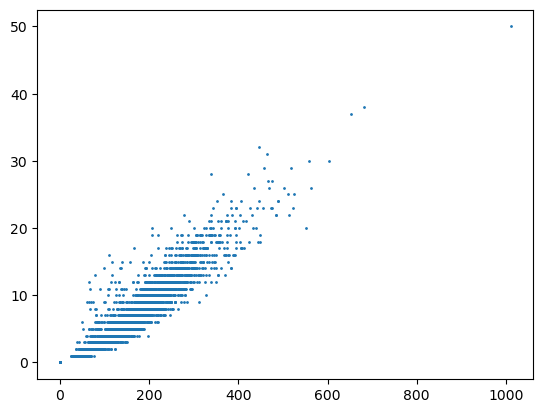

LinregressResult(slope=0.05322036210747622, intercept=-1.5776033596602588, rvalue=0.9193543370828551, pvalue=0.0, stderr=0.0004239501759535053, intercept_stderr=0.0833392585256828)

In [62]:
x=p14['non-MT']
y=p14['MT-ND1']
lin_ND1x=np.sqrt(x*y)
lin_ND1y=y
plt.scatter(lin_ND1x,lin_ND1y, s=1,)
linND1=st.linregress(lin_ND1x,lin_ND1y)
plt.show()
linND1

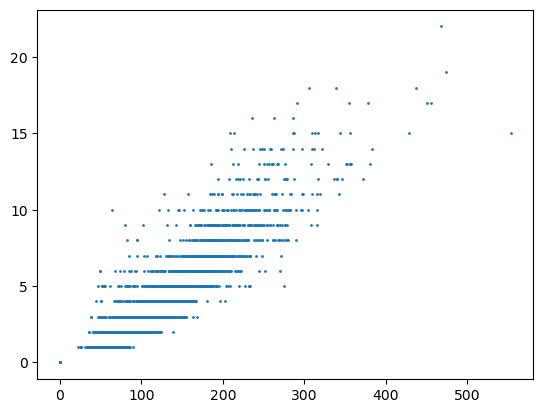

LinregressResult(slope=0.0413006519659096, intercept=-0.9034236638093711, rvalue=0.8984395985080696, pvalue=0.0, stderr=0.00037573396498681913, intercept_stderr=0.05492678465614774)

In [71]:
x=p14['non-MT']
y=p14['MT-ND2']
lin_ND2x=np.sqrt(x*y)
lin_ND2y=y
plt.scatter(lin_ND2x,lin_ND2y, s=1)
linND2=st.linregress(lin_ND2x,lin_ND2y)
plt.show()
linND2

In [74]:
max(lin_ND2x)

553.8230764422876

In [70]:
M=max(p14['non-MT'])
M

20448

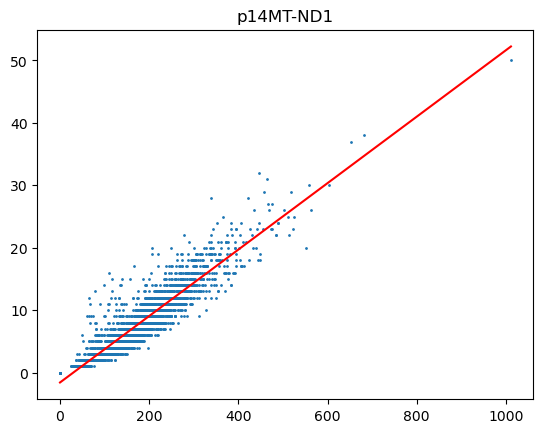

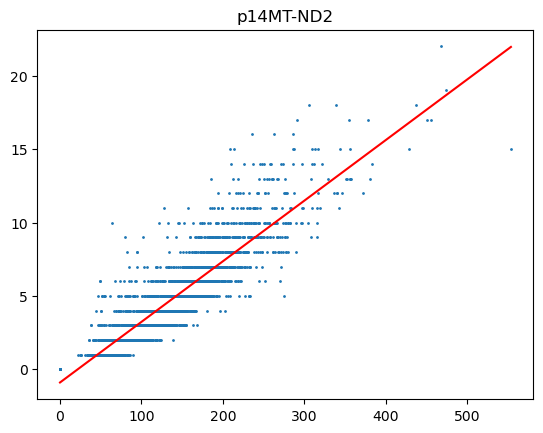

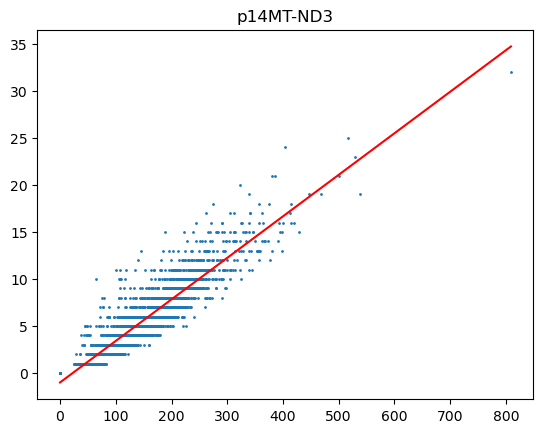

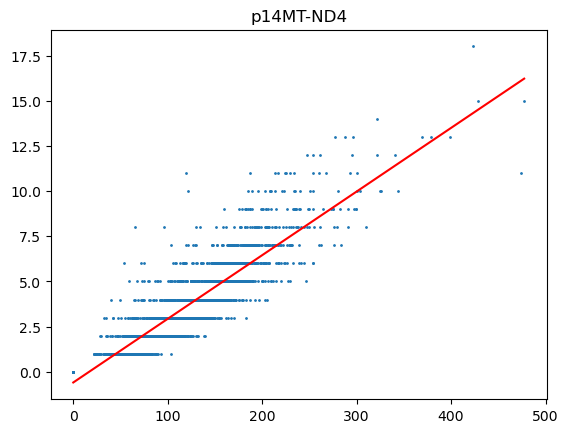

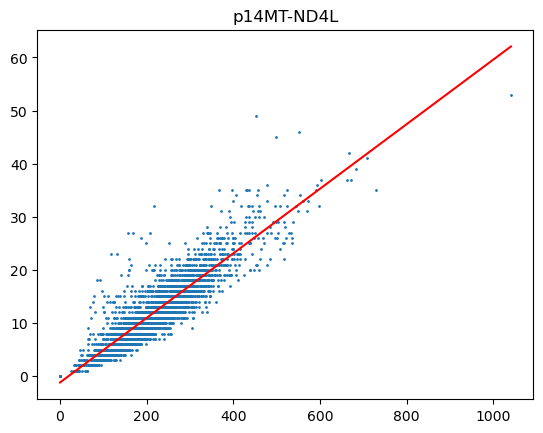

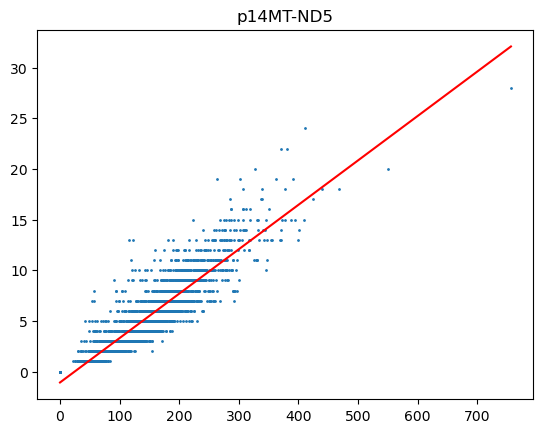

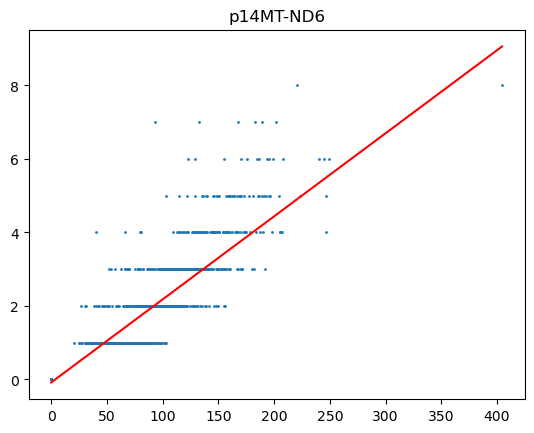

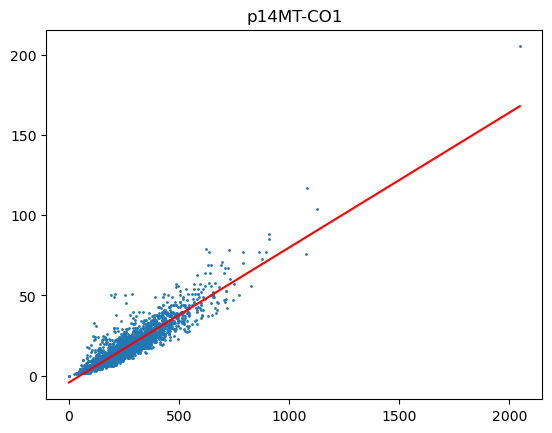

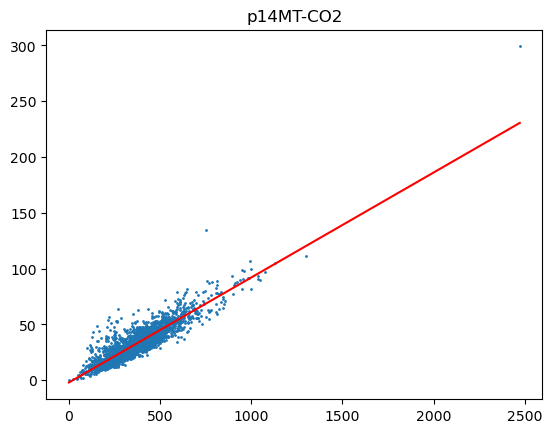

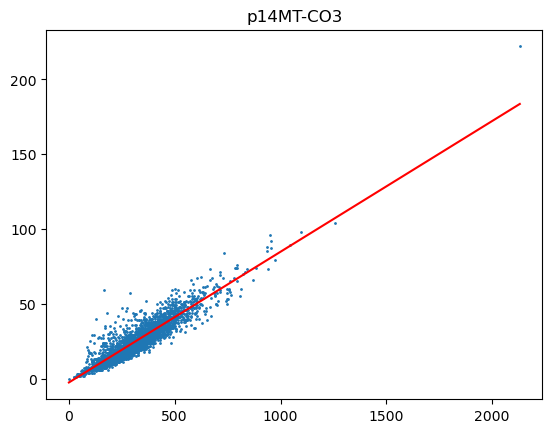

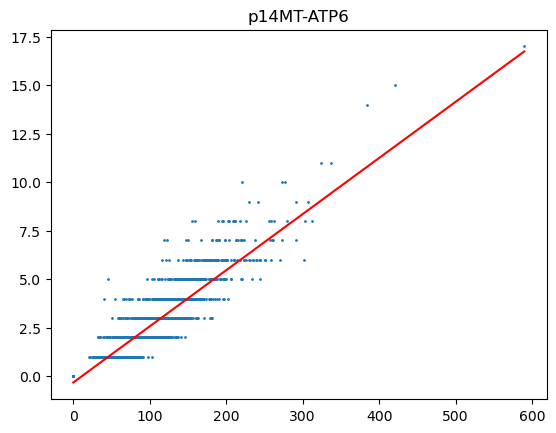

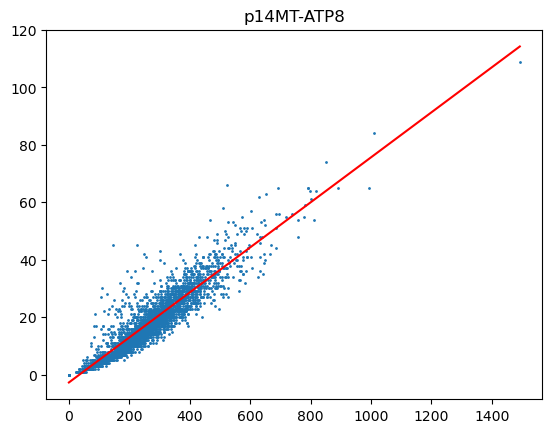

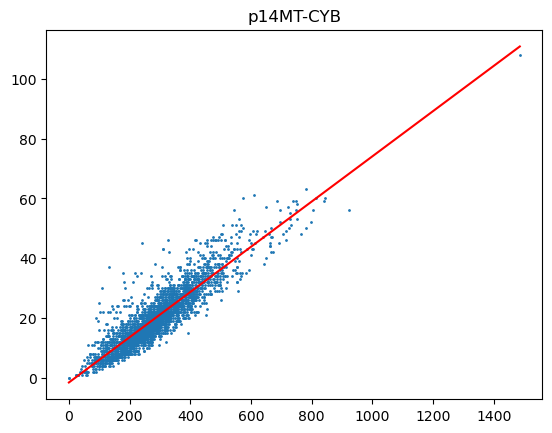

[0.9193543370828551,
 0.8984395985080696,
 0.9118761957878451,
 0.9034948901418001,
 0.886424220964746,
 0.9074537792903041,
 0.9224711938551914,
 0.9039584851169503,
 0.8995383908462922,
 0.9147993472295066,
 0.9201163617981739,
 0.9110017671122358,
 0.8998761126089311]

In [80]:
x=p14['non-MT']
r14_l=[]
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    y=p14[i]
    ax.set_title('p14'+''+i)
    lin_x=np.sqrt(x*y)
    lin_y=y
    ax.scatter(lin_x,lin_y, s=1)
    M=max(lin_x)
    m=min(lin_x)
    lin=st.linregress(lin_x,lin_y)
    l=np.array([m,M])
    ax.plot(l,lin.intercept+lin.slope*l,color='red')
    r14_l.append(lin.rvalue)
    plt.show()
r14_l


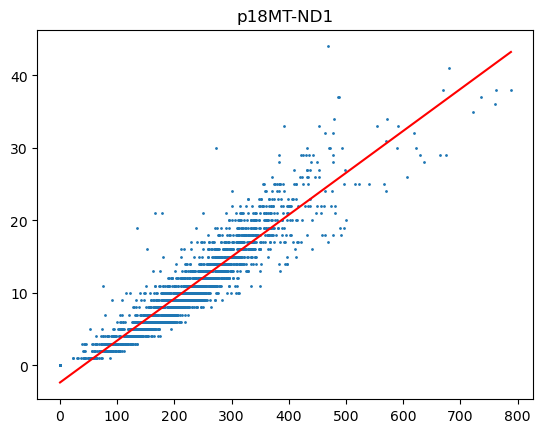

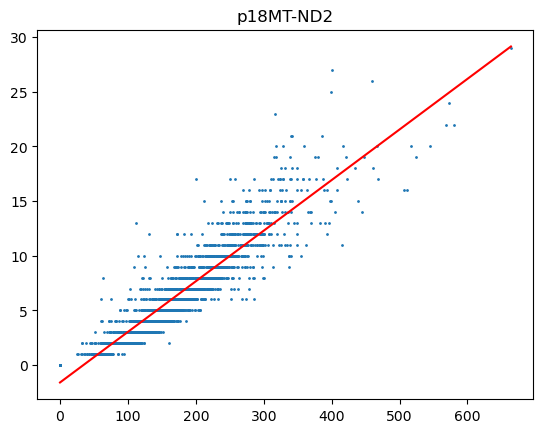

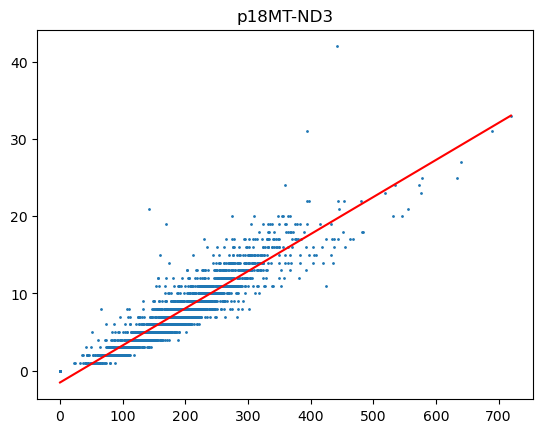

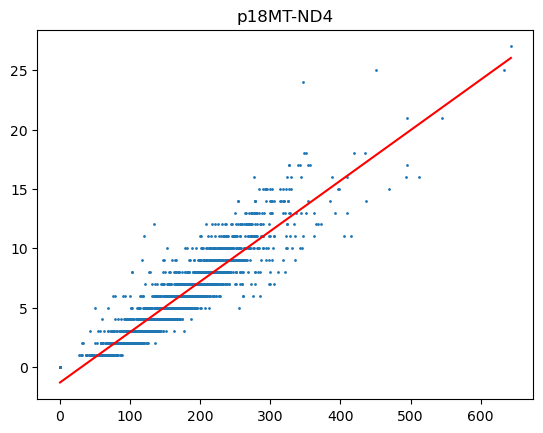

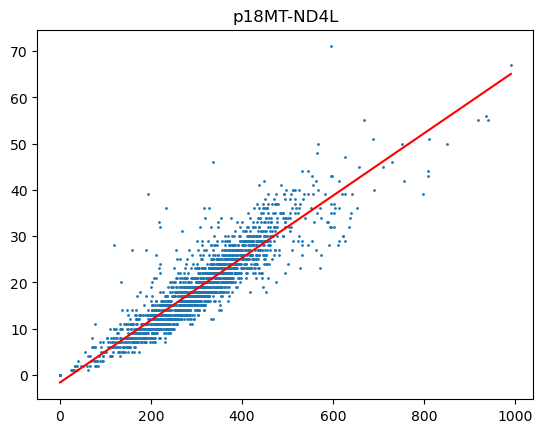

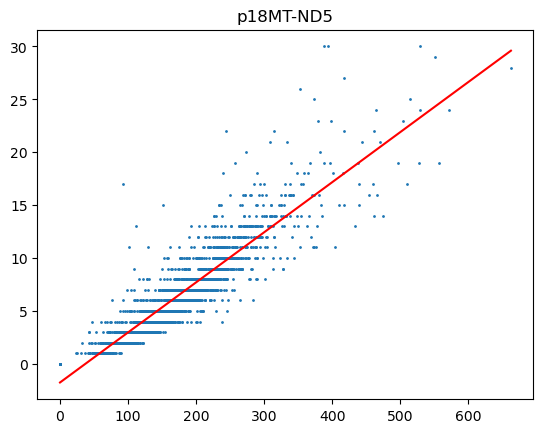

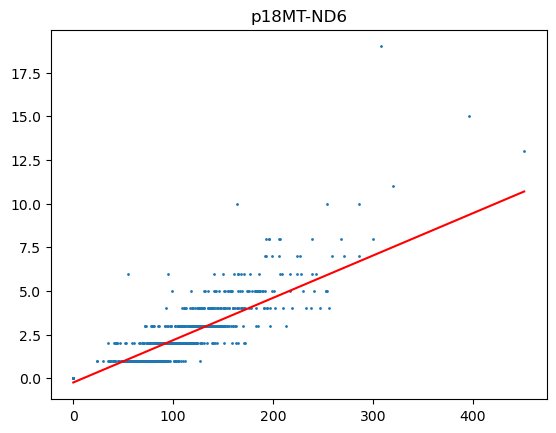

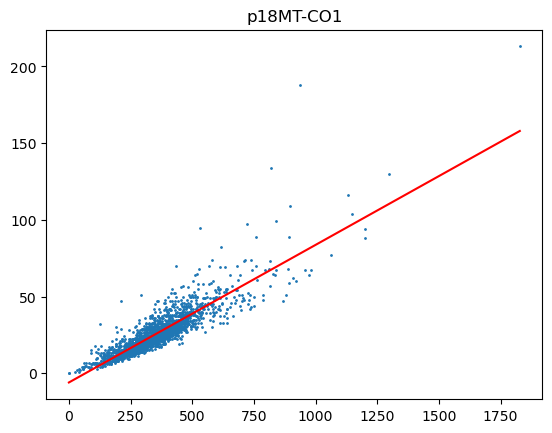

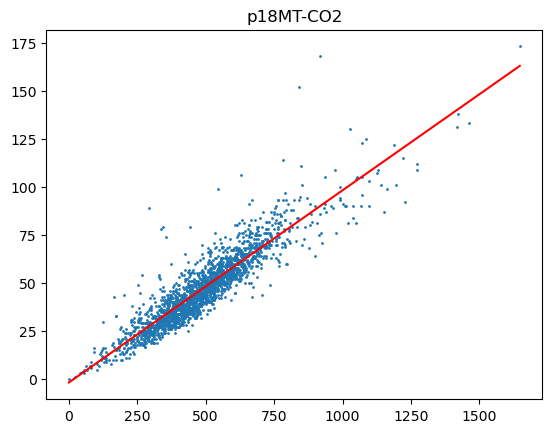

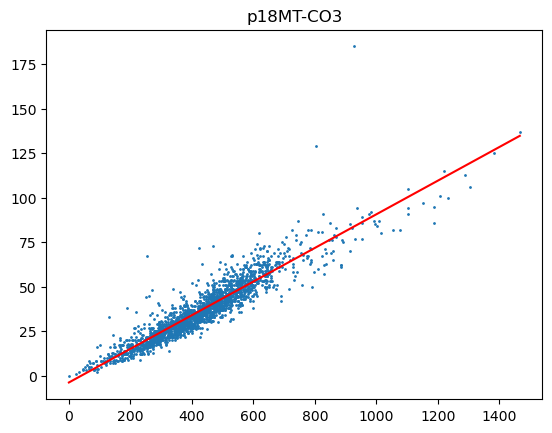

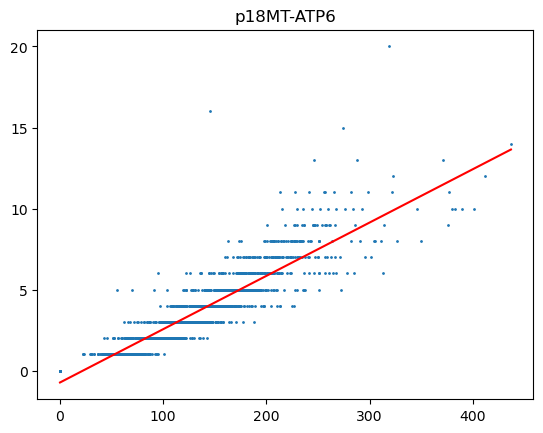

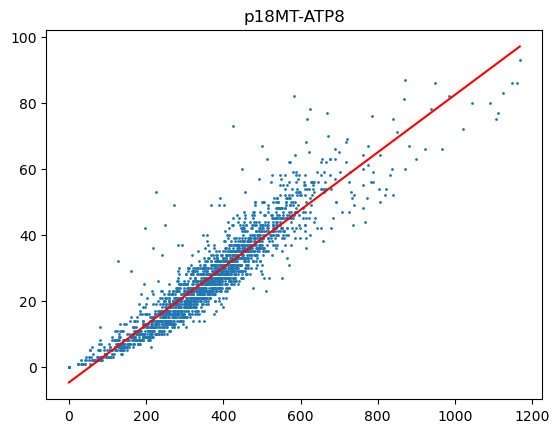

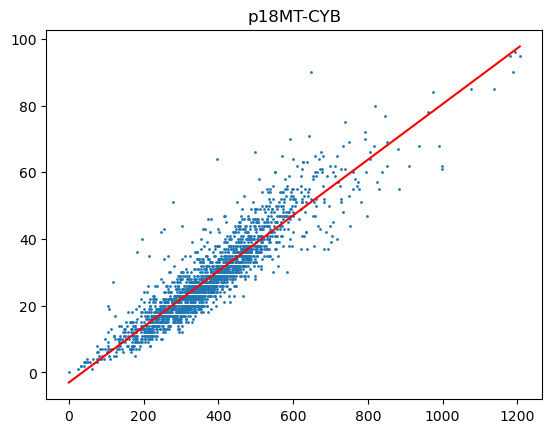

[0.9276197851436622,
 0.9198243489094439,
 0.914136578831026,
 0.9216629872917725,
 0.9019143295338716,
 0.9032289939764799,
 0.9009927368936045,
 0.8777520401260576,
 0.9122054124811845,
 0.9287138790483574,
 0.9157628274881392,
 0.9305091187874125,
 0.9173545211632691]

In [83]:
x=p18['non-MT']
r18_l=[]
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    y=p18[i]
    ax.set_title('p18'+''+i)
    lin_x=np.sqrt(x*y)
    lin_y=y
    ax.scatter(lin_x,lin_y, s=1)
    M=max(lin_x)
    m=min(lin_x)
    lin=st.linregress(lin_x,lin_y)
    l=np.array([m,M])
    ax.plot(l,lin.intercept+lin.slope*l,color='red')
    r18_l.append(lin.rvalue)
    plt.show()
r18_l


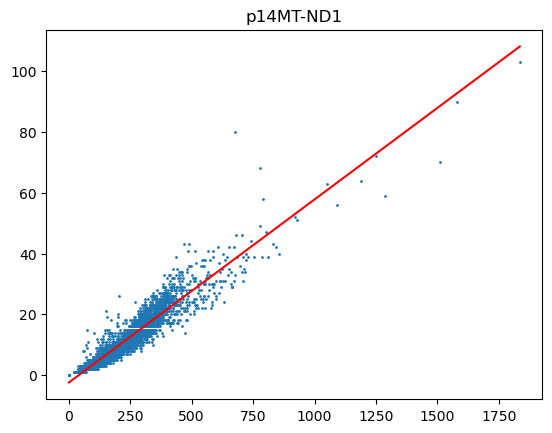

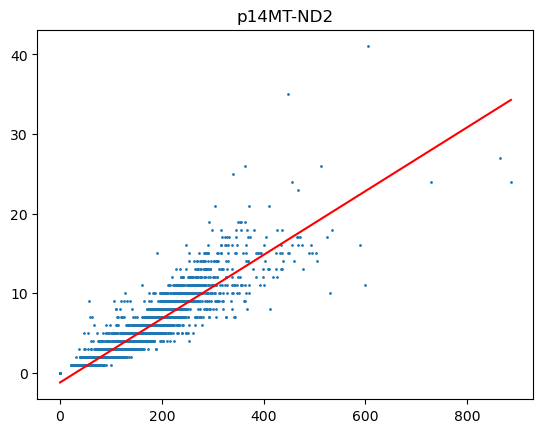

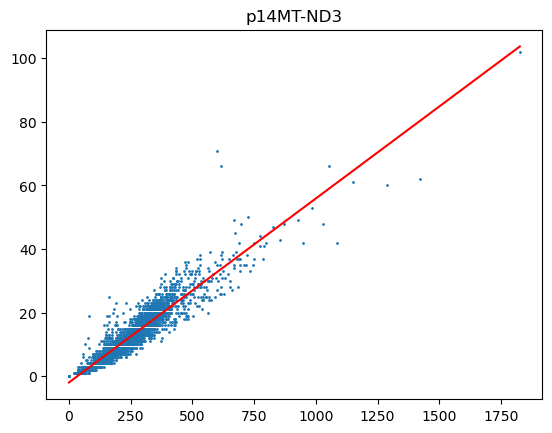

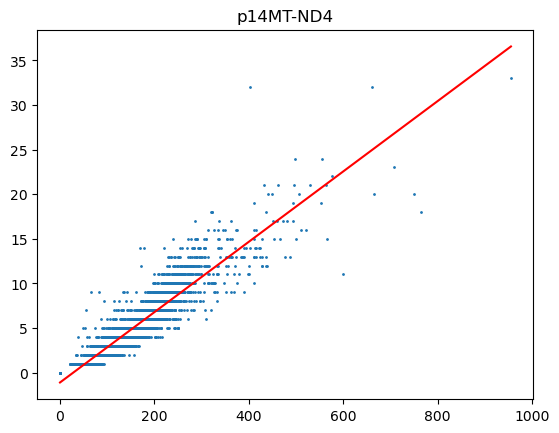

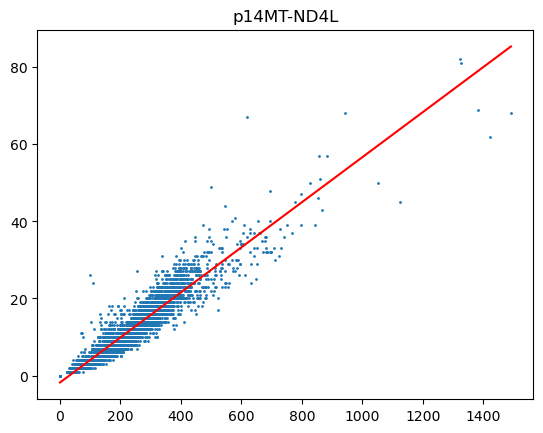

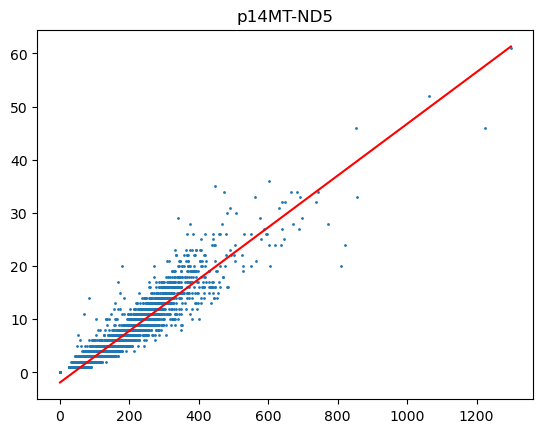

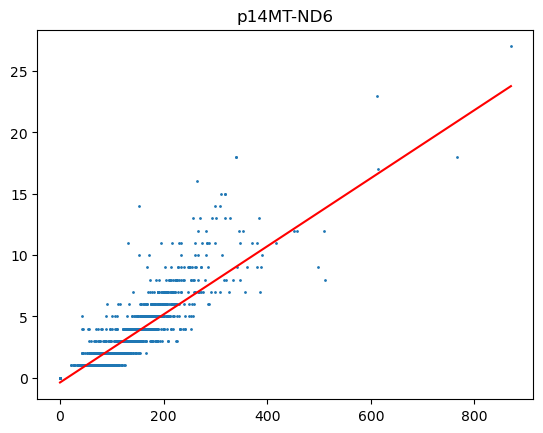

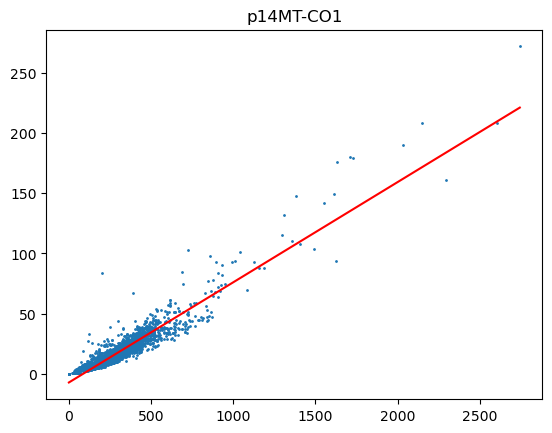

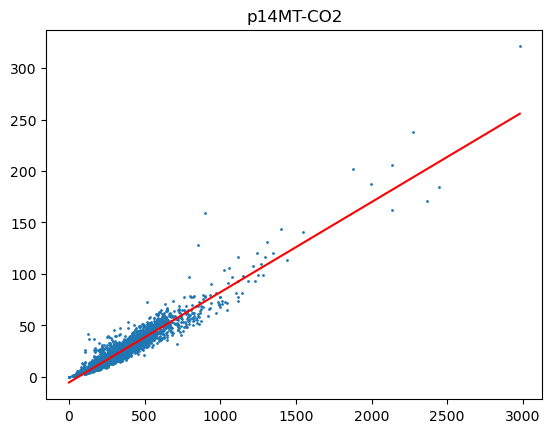

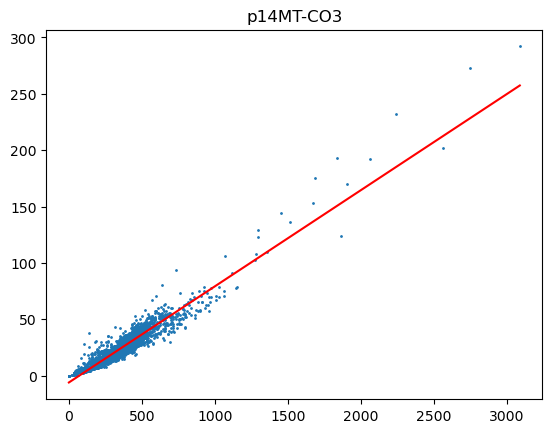

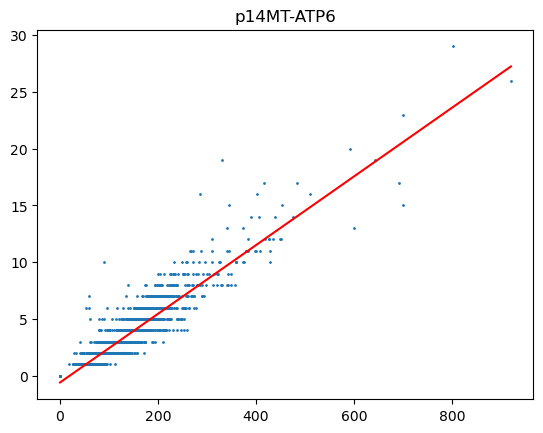

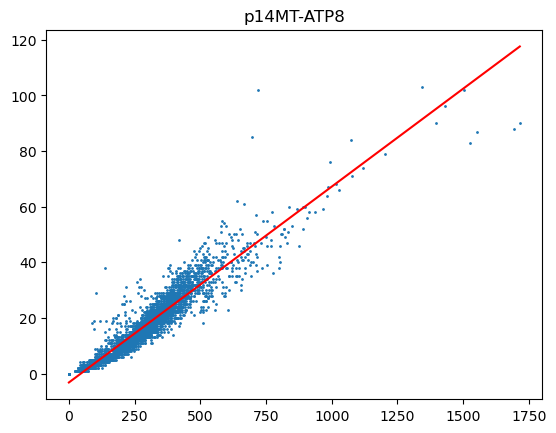

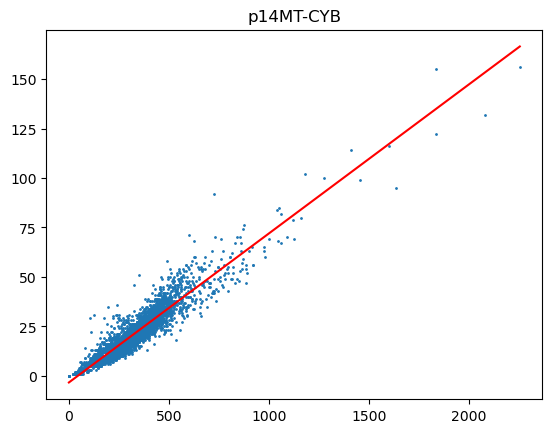

[0.9326164906309043,
 0.9085491696247732,
 0.9298351563827457,
 0.9180303532458122,
 0.9237444606677229,
 0.9316147780621653,
 0.9151996341897147,
 0.9400011091745998,
 0.9415631727985092,
 0.9514795018491926,
 0.9340817892317528,
 0.9358098519952194,
 0.9304490829904211]

In [81]:
x=p24['non-MT']
r24_l=[]
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    y=p24[i]
    ax.set_title('p14'+''+i)
    lin_x=np.sqrt(x*y)
    lin_y=y
    ax.scatter(lin_x,lin_y, s=1)
    M=max(lin_x)
    m=min(lin_x)
    lin=st.linregress(lin_x,lin_y)
    l=np.array([m,M])
    ax.plot(l,lin.intercept+lin.slope*l,color='red')
    r24_l.append(lin.rvalue)
    plt.show()
r24_l


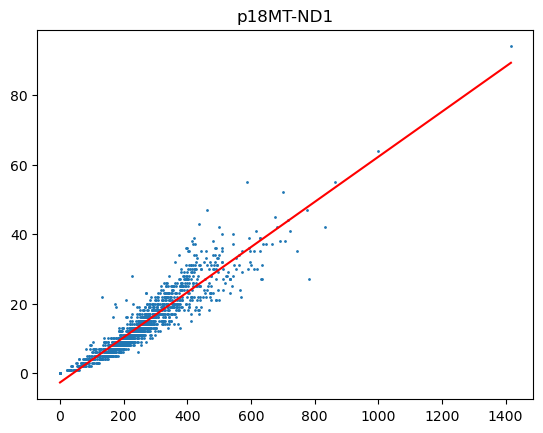

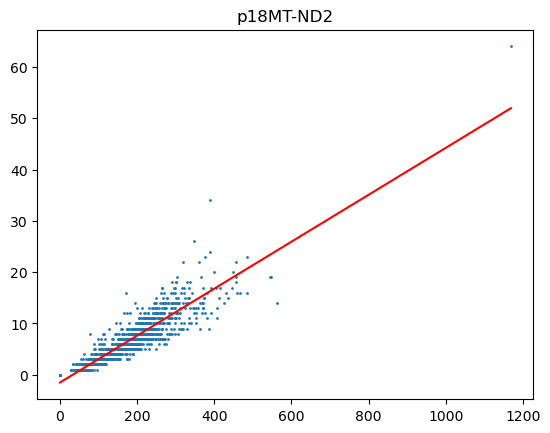

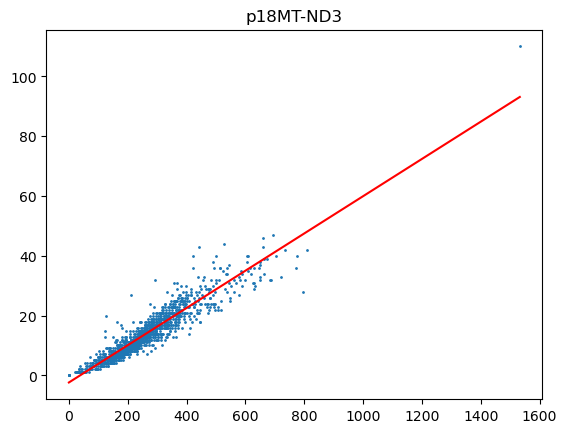

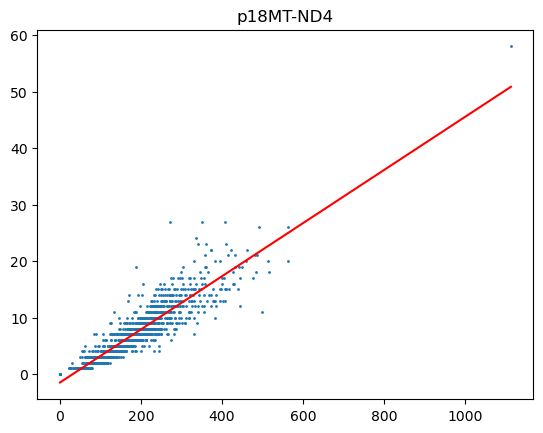

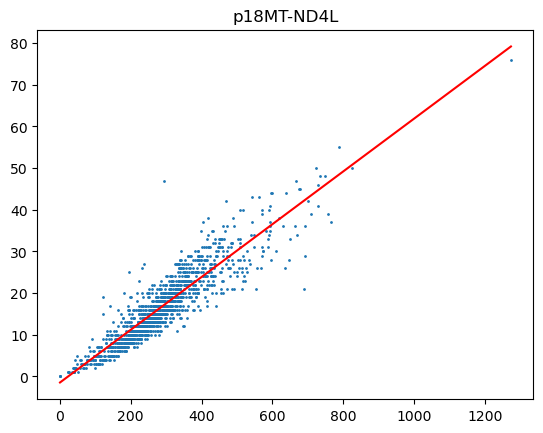

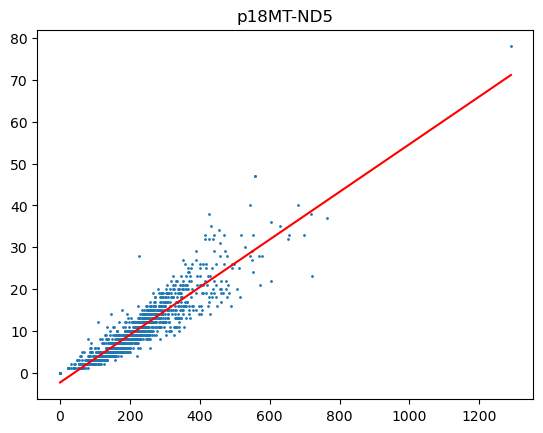

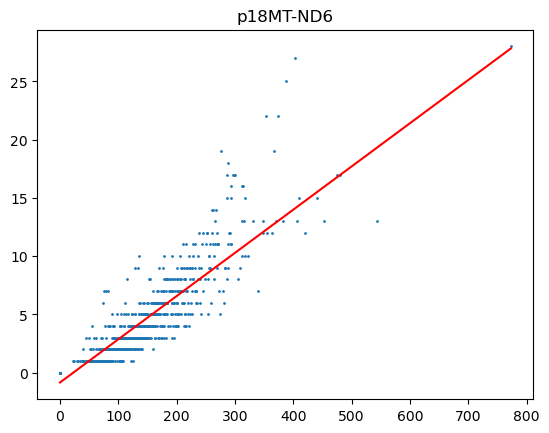

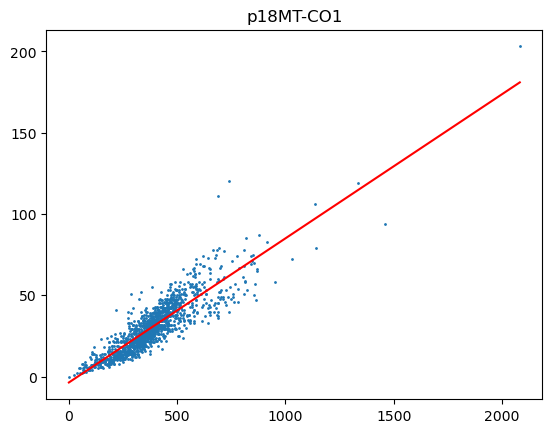

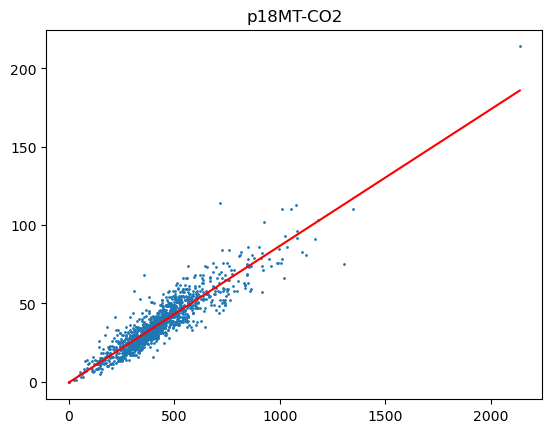

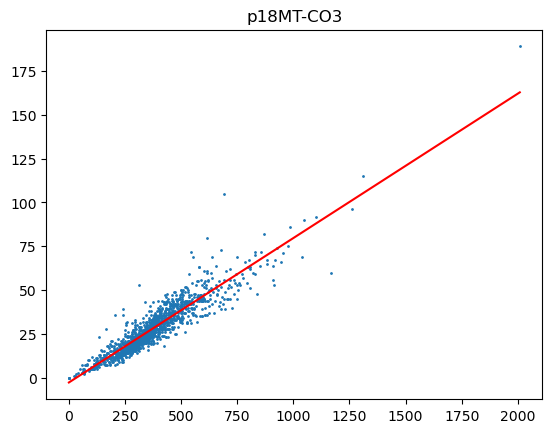

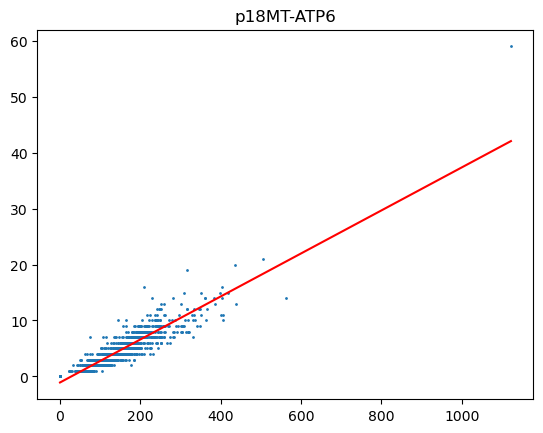

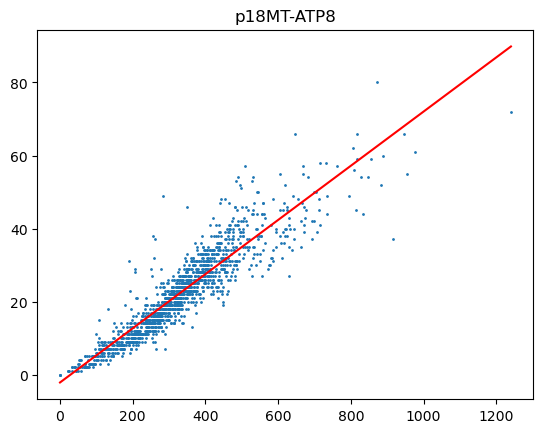

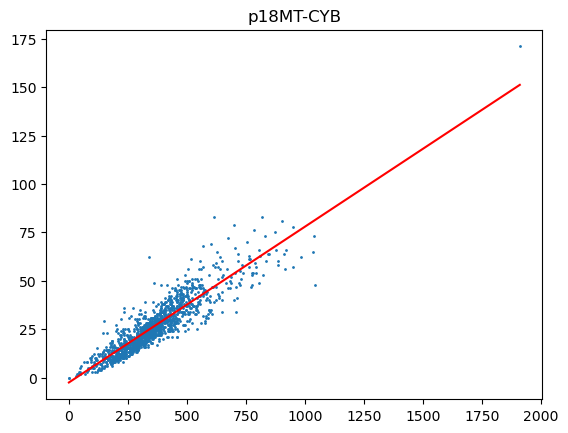

[0.9296569264621144,
 0.9046373200093462,
 0.9362261782360799,
 0.9068943499847265,
 0.9121817303153056,
 0.9190861996310447,
 0.9033609009379022,
 0.885406923314882,
 0.915493410850901,
 0.9256941077832602,
 0.914144255016322,
 0.916641646945044,
 0.908927452482853]

In [84]:
x=p28['non-MT']
r28_l=[]
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    y=p28[i]
    ax.set_title('p18'+''+i)
    lin_x=np.sqrt(x*y)
    lin_y=y
    ax.scatter(lin_x,lin_y, s=1)
    M=max(lin_x)
    m=min(lin_x)
    lin=st.linregress(lin_x,lin_y)
    l=np.array([m,M])
    ax.plot(l,lin.intercept+lin.slope*l,color='red')
    r28_l.append(lin.rvalue)
    plt.show()
r28_l


Partial Covariance test thing; Plotting each gene w.r.t UMI of non-MT Genes

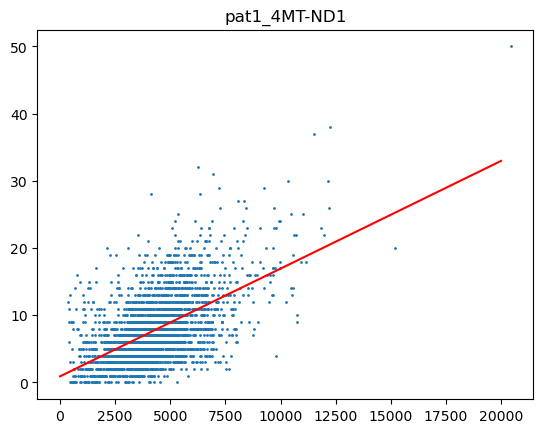

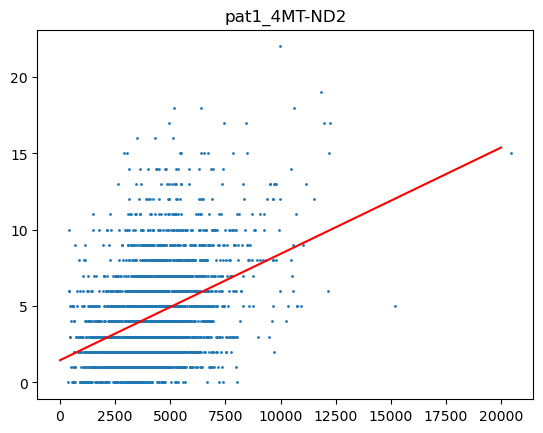

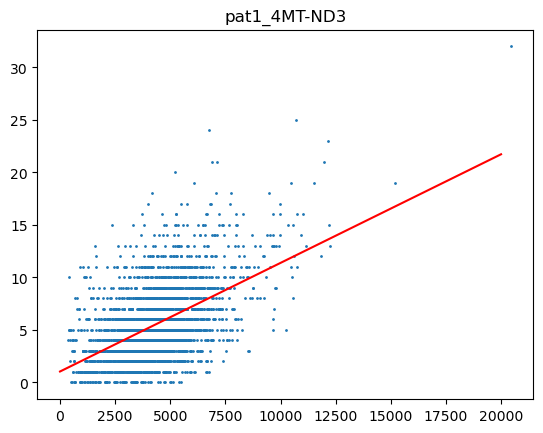

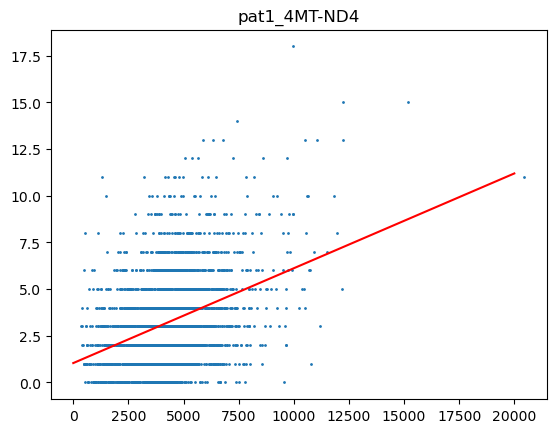

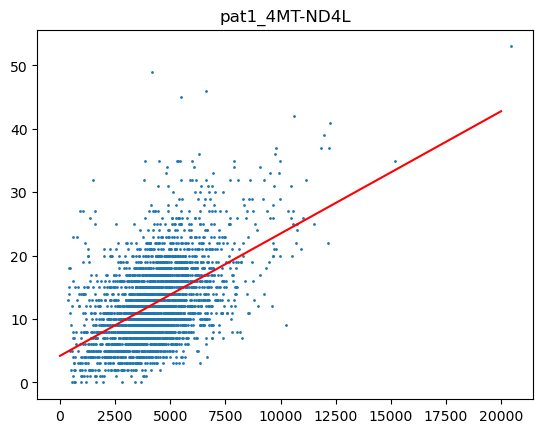

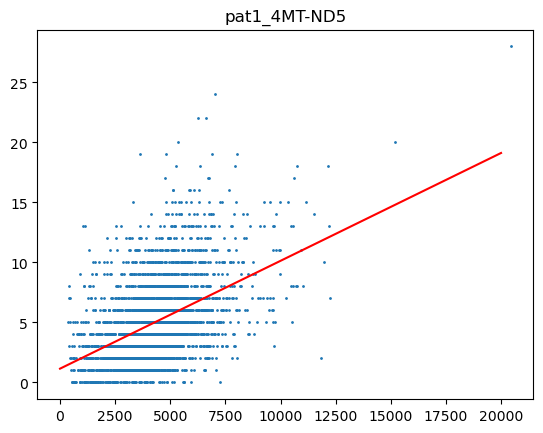

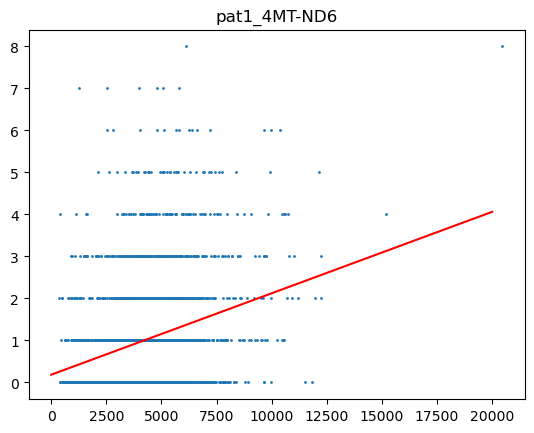

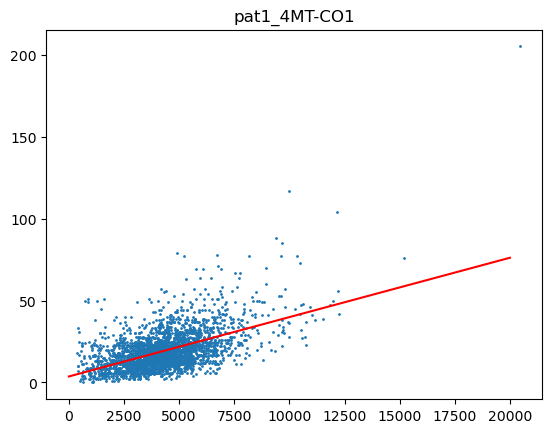

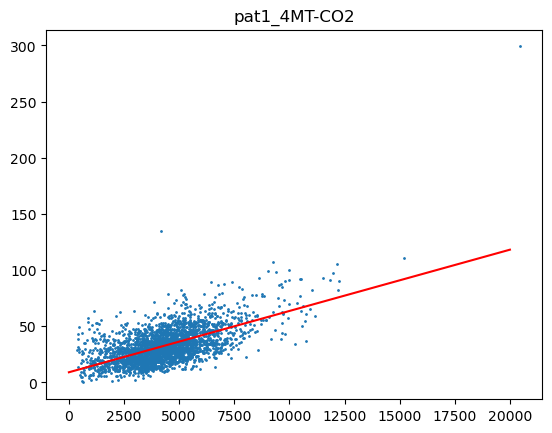

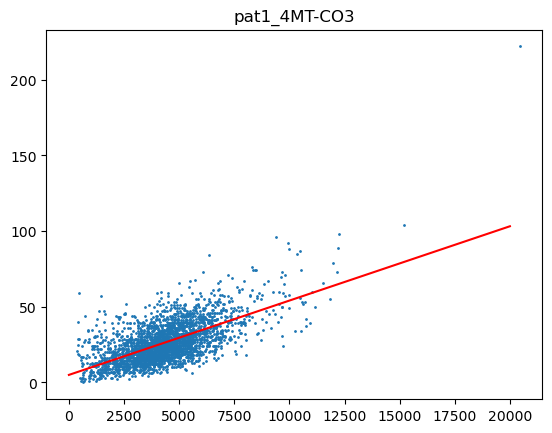

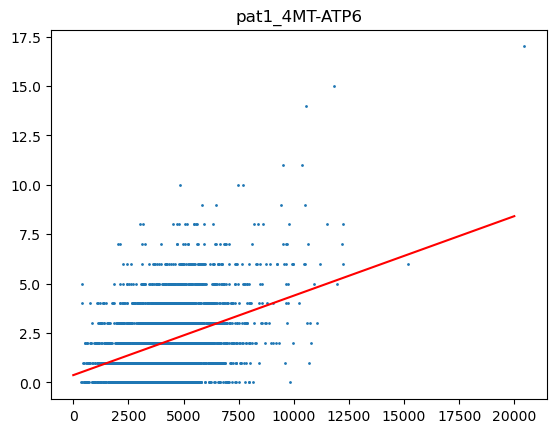

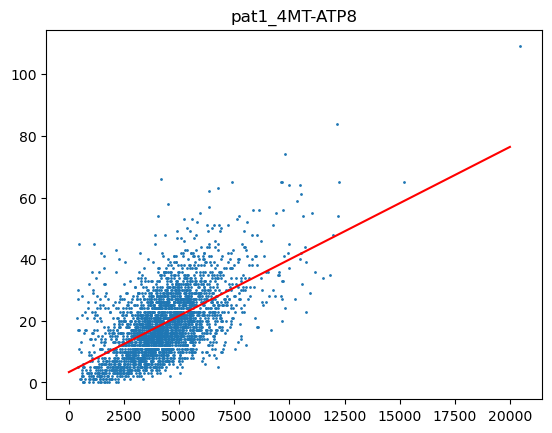

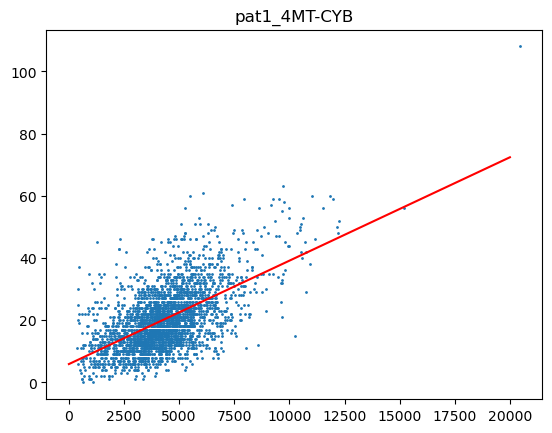

In [36]:
r_l=[]
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    ax.set_title('pat1_4'+''+i)
    ax.scatter(p14['non-MT'],p14[i],s=1)
    beta=st.linregress(p14['non-MT'], p14[i])
    ax.plot(np.linspace(0,20000,num=5),beta.slope*np.linspace(0,20000,num=5)+beta.intercept,color='red')
    r_l.append(beta.rvalue)
    plt.show()


In [37]:
r_l

[0.5596523114536229,
 0.39299530193117016,
 0.5157435648843197,
 0.37177676944246535,
 0.5199861656981543,
 0.45698220026144665,
 0.2691557748427762,
 0.5331149393794655,
 0.6102478545650166,
 0.6411428194996488,
 0.3898277364039178,
 0.5875163091193268,
 0.5794309776211672]

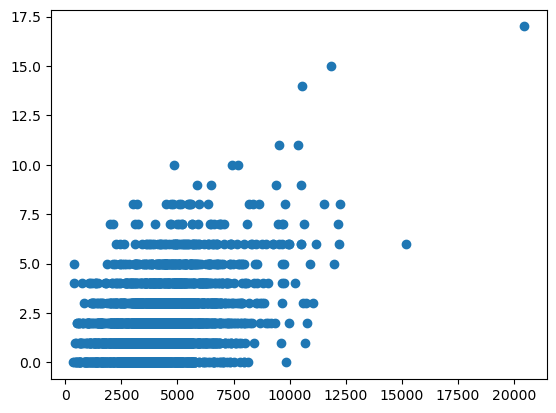

In [18]:
plt.scatter(p14['non-MT'],p14['MT-ATP6'])